In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [18]:
file_consumos  = "Consumo1prodValpo.csv"
file_temp = "tempvalp.csv"

In [19]:
df = pd.read_csv(file_consumos , sep=';' ,  encoding='utf-8' , decimal=',') #decimal para leer las comas

In [20]:
df_temp = pd.read_csv(file_temp , sep=';' ,  encoding='utf-8' , decimal=',') #decimal para leer las comas

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
COMUNA            35 non-null object
PLAN_COMERCIAL    35 non-null object
CATEGORIA         35 non-null object
SUBCATEGORIA      35 non-null object
PRODUCT_ID        35 non-null object
AÑO               35 non-null int64
MES               35 non-null int64
CONSUMO           35 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ KB


In [22]:
## uno los datos de consumo con  temperatura 
df = pd.merge(df, df_temp,  how='left', left_on=['AÑO','MES'], right_on = ['year','mes'])[['COMUNA', 'PLAN_COMERCIAL', 'CATEGORIA', 'SUBCATEGORIA', 'PRODUCT_ID', 'AÑO', 'MES', 'CONSUMO' , 'max', 'avg', 'min']]
#df.to_csv('data_one_p.csv', encoding='utf-8', index=False , sep=';' )
    

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 11 columns):
COMUNA            35 non-null object
PLAN_COMERCIAL    35 non-null object
CATEGORIA         35 non-null object
SUBCATEGORIA      35 non-null object
PRODUCT_ID        35 non-null object
AÑO               35 non-null int64
MES               35 non-null int64
CONSUMO           35 non-null float64
max               35 non-null float64
avg               35 non-null float64
min               35 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.3+ KB


In [7]:
## creo las variables ficticias 
hot_com= pd.get_dummies(df['COMUNA']) 
hot_com.head()
hot_plan = pd.get_dummies(df['PLAN_COMERCIAL'])
hot_plan.head() 
hot_cat = pd.get_dummies(df['CATEGORIA'])
hot_cat.head() 
hot_subcat = pd.get_dummies(df['SUBCATEGORIA'])
hot_subcat.head()
hot_año= pd.get_dummies(df['AÑO'])
hot_año.head()
hot_mes= pd.get_dummies(df['MES'])
hot_mes.head()

#creo el dataframe final ocn todas la variables 
final = pd.concat([  hot_com.astype(int) , hot_plan.astype(int) , hot_cat.astype(int) , hot_subcat.astype(int),hot_año.astype(int) , hot_mes.astype(int) , df[[ 'max','avg','min','CONSUMO']] ,  ] , axis=1)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 23 columns):
117 - VALPARAÍSO         35 non-null int32
55 - BT-1A               35 non-null int32
1 - RESIDENCIAL          35 non-null int32
3 - CASA - HABITACIÓN    35 non-null int32
2016                     35 non-null int32
2017                     35 non-null int32
2018                     35 non-null int32
1                        35 non-null int32
2                        35 non-null int32
3                        35 non-null int32
4                        35 non-null int32
5                        35 non-null int32
6                        35 non-null int32
7                        35 non-null int32
8                        35 non-null int32
9                        35 non-null int32
10                       35 non-null int32
11                       35 non-null int32
12                       35 non-null int32
max                      35 non-null float64
avg                      35 non-nul

In [8]:
df= final.astype('float32')

In [36]:
#final.to_csv('hot_data_one_p.csv', encoding='utf-8', index=False , sep=';' )

In [26]:
#X = final.drop(['CONSUMO'], axis=1).values.reshape(-1,1)
#y = final[['CONSUMO']].values.reshape(-1,1) 

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0,0.5,'Error Absoluto Medio')

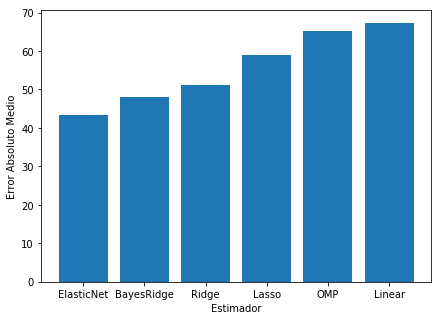

In [9]:
rs = 1
# lista de modelos 
ests = [linear_model.LinearRegression(),
        linear_model.Ridge(),
        linear_model.Lasso(),
        linear_model.ElasticNet(),
        linear_model.BayesianRidge(),
        linear_model.OrthogonalMatchingPursuit()]
#Etiquetas de los modelos 
ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])

## same thing
#X = df.drop(['CONSUMO'], axis=1).as_matrix()
#y = df[['CONSUMO']].as_matrix()

#X = df.drop(['CONSUMO'], axis=1).values.reshape(-1,1)
#y = df[['CONSUMO']].values.reshape(-1,1)
#
#X_train, X_test, y_train, y_test = train_test_split( X , df[['CONSUMO']] , test_size=0.05, random_state=20)

X_train, X_test, y_train, y_test = train_test_split( df.drop(['CONSUMO'], axis=1) , df[['CONSUMO']] , test_size=0.3, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimador')
plt.ylabel('Error Absoluto Medio') 

## Regresión Lineal 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()

In [21]:
lm.fit(X_train , y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
X_train.shape

(24, 22)

In [23]:
X_test.shape

(11, 22)

In [24]:
valores_estimados = lm.predict(X_test)

In [25]:
plot_values = pd.DataFrame()

plot_values=y_test
plot_values['y_pred'] =valores_estimados

plot_values.head()

,CONSUMO,y_pred
4,186.500000,174.705688
23,118.099998,143.040588
13,111.099998,215.753723
1,132.899994,129.831604
10,39.400002,15.805115


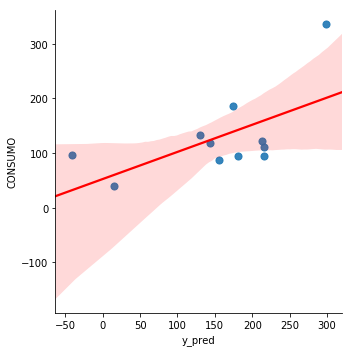

In [26]:
# Regresión lineal simple 
g = sns.lmplot(data = plot_values, x = 'y_pred', y ='CONSUMO' ,  line_kws={'color': 'red'} , scatter_kws={"s": 50 , 'alpha':0.9})

## Red neuronal

In [10]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout , Activation , Flatten
## or witn tensorflow
from tensorflow.python.keras import optimizers

Using TensorFlow backend.


In [11]:
#df 
array = df.values
#array.info()
X = array[:,0:22] 
Y = array[:,22]

In [12]:
#X_train
#X_train, X_test, y_train, y_test

In [15]:
model = Sequential()
model.add(Dense(22,  input_dim=22,   activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(300,  activation='relu'))
#model.add(Dense(4,   activation='relu')) #74%
model.add(Dense(1,   activation='relu' ))

In [17]:
# learning rate ,menor es mejor
lr = 0.0004
model.compile(loss='mse', optimizer="adam", metrics=['accuracy']) # 80
#tensor_board = TensorBoard('./logs/consumo')
model.fit(X_train,y_train, epochs=500, batch_size=30)
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/500
24/24 [==============================] - 0s 11ms/step - loss: 703.7682 - acc: 0.0000e+00
Epoch 2/500
24/24 [==============================] - 0s 80us/step - loss: 722.3207 - acc: 0.0000e+00
Epoch 3/500
24/24 [==============================] - 0s 83us/step - loss: 1023.9546 - acc: 0.0000e+00
Epoch 4/500
24/24 [==============================] - 0s 83us/step - loss: 706.9912 - acc: 0.0000e+00
Epoch 5/500
24/24 [==============================] - 0s 127us/step - loss: 929.5454 - acc: 0.0000e+00
Epoch 6/500
24/24 [==============================] - 0s 123us/step - loss: 849.8095 - acc: 0.0000e+00
Epoch 7/500
24/24 [==============================] - 0s 83us/step - loss: 687.0322 - acc: 0.0000e+00
Epoch 8/500
24/24 [==============================] - 0s 84us/step - loss: 743.4053 - acc: 0.0000e+00
Epoch 9/500
24/24 [==============================] - 0s 83us/step - loss: 814.4318 - acc: 0.0000e+00
Epoch 10/500
24/24 [==============================] - 0s 125us/step - loss: 751.5104 - a

24/24 [==============================] - 0s 167us/step - loss: 449.4323 - acc: 0.0000e+00
Epoch 82/500
24/24 [==============================] - 0s 125us/step - loss: 446.0316 - acc: 0.0000e+00
Epoch 83/500
24/24 [==============================] - 0s 125us/step - loss: 442.9273 - acc: 0.0000e+00
Epoch 84/500
24/24 [==============================] - 0s 83us/step - loss: 439.6187 - acc: 0.0000e+00
Epoch 85/500
24/24 [==============================] - 0s 83us/step - loss: 436.4596 - acc: 0.0000e+00
Epoch 86/500
24/24 [==============================] - 0s 125us/step - loss: 432.9573 - acc: 0.0000e+00
Epoch 87/500
24/24 [==============================] - 0s 82us/step - loss: 428.7265 - acc: 0.0000e+00
Epoch 88/500
24/24 [==============================] - 0s 83us/step - loss: 424.7618 - acc: 0.0000e+00
Epoch 89/500
24/24 [==============================] - 0s 83us/step - loss: 420.0706 - acc: 0.0000e+00
Epoch 90/500
24/24 [==============================] - 0s 125us/step - loss: 415.0858 - acc:

Epoch 161/500
24/24 [==============================] - 0s 125us/step - loss: 186.6491 - acc: 0.0000e+00
Epoch 162/500
24/24 [==============================] - 0s 84us/step - loss: 183.8431 - acc: 0.0417
Epoch 163/500
24/24 [==============================] - 0s 83us/step - loss: 181.4594 - acc: 0.0417
Epoch 164/500
24/24 [==============================] - 0s 125us/step - loss: 178.5526 - acc: 0.0417
Epoch 165/500
24/24 [==============================] - 0s 125us/step - loss: 175.5939 - acc: 0.0000e+00
Epoch 166/500
24/24 [==============================] - 0s 208us/step - loss: 173.1712 - acc: 0.0417
Epoch 167/500
24/24 [==============================] - 0s 83us/step - loss: 170.0395 - acc: 0.0000e+00
Epoch 168/500
24/24 [==============================] - 0s 127us/step - loss: 167.2310 - acc: 0.0000e+00
Epoch 169/500
24/24 [==============================] - 0s 83us/step - loss: 164.3791 - acc: 0.0417
Epoch 170/500
24/24 [==============================] - 0s 125us/step - loss: 161.5173 - 

Epoch 242/500
24/24 [==============================] - 0s 124us/step - loss: 23.8480 - acc: 0.0000e+00
Epoch 243/500
24/24 [==============================] - 0s 83us/step - loss: 22.1720 - acc: 0.0000e+00
Epoch 244/500
24/24 [==============================] - 0s 167us/step - loss: 24.5012 - acc: 0.0000e+00
Epoch 245/500
24/24 [==============================] - 0s 125us/step - loss: 26.8391 - acc: 0.0000e+00
Epoch 246/500
24/24 [==============================] - 0s 83us/step - loss: 23.6340 - acc: 0.0000e+00
Epoch 247/500
24/24 [==============================] - 0s 126us/step - loss: 19.6823 - acc: 0.0000e+00
Epoch 248/500
24/24 [==============================] - 0s 125us/step - loss: 19.7651 - acc: 0.0000e+00
Epoch 249/500
24/24 [==============================] - 0s 125us/step - loss: 21.3501 - acc: 0.0000e+00
Epoch 250/500
24/24 [==============================] - 0s 83us/step - loss: 20.8116 - acc: 0.0000e+00
Epoch 251/500
24/24 [==============================] - 0s 167us/step - loss:

Epoch 324/500
24/24 [==============================] - 0s 125us/step - loss: 1.3664 - acc: 0.0833
Epoch 325/500
24/24 [==============================] - 0s 125us/step - loss: 1.2132 - acc: 0.0833
Epoch 326/500
24/24 [==============================] - 0s 167us/step - loss: 1.1411 - acc: 0.0833
Epoch 327/500
24/24 [==============================] - 0s 84us/step - loss: 1.1272 - acc: 0.0833
Epoch 328/500
24/24 [==============================] - 0s 83us/step - loss: 1.1700 - acc: 0.0833
Epoch 329/500
24/24 [==============================] - 0s 83us/step - loss: 1.2951 - acc: 0.0833
Epoch 330/500
24/24 [==============================] - 0s 125us/step - loss: 1.5105 - acc: 0.0000e+00
Epoch 331/500
24/24 [==============================] - 0s 167us/step - loss: 1.9380 - acc: 0.0000e+00
Epoch 332/500
24/24 [==============================] - 0s 126us/step - loss: 2.3556 - acc: 0.0000e+00
Epoch 333/500
24/24 [==============================] - 0s 125us/step - loss: 3.1602 - acc: 0.0000e+00
Epoch 3

Epoch 407/500
24/24 [==============================] - 0s 125us/step - loss: 20.7674 - acc: 0.0000e+00
Epoch 408/500
24/24 [==============================] - 0s 124us/step - loss: 21.1093 - acc: 0.0000e+00
Epoch 409/500
24/24 [==============================] - 0s 125us/step - loss: 3.4643 - acc: 0.0417
Epoch 410/500
24/24 [==============================] - 0s 84us/step - loss: 5.7784 - acc: 0.0000e+00
Epoch 411/500
24/24 [==============================] - 0s 167us/step - loss: 15.5070 - acc: 0.0000e+00
Epoch 412/500
24/24 [==============================] - 0s 208us/step - loss: 6.8317 - acc: 0.0000e+00
Epoch 413/500
24/24 [==============================] - 0s 125us/step - loss: 1.5661 - acc: 0.0833
Epoch 414/500
24/24 [==============================] - 0s 125us/step - loss: 10.8737 - acc: 0.0000e+00
Epoch 415/500
24/24 [==============================] - 0s 125us/step - loss: 7.3577 - acc: 0.0000e+00
Epoch 416/500
24/24 [==============================] - 0s 168us/step - loss: 0.6620 - a

Epoch 490/500
24/24 [==============================] - 0s 124us/step - loss: 0.0041 - acc: 0.0833
Epoch 491/500
24/24 [==============================] - 0s 125us/step - loss: 0.0049 - acc: 0.0833
Epoch 492/500
24/24 [==============================] - 0s 125us/step - loss: 0.0026 - acc: 0.0833
Epoch 493/500
24/24 [==============================] - 0s 125us/step - loss: 0.0014 - acc: 0.0833
Epoch 494/500
24/24 [==============================] - 0s 125us/step - loss: 0.0029 - acc: 0.0833
Epoch 495/500
24/24 [==============================] - 0s 167us/step - loss: 0.0034 - acc: 0.0833
Epoch 496/500
24/24 [==============================] - 0s 167us/step - loss: 0.0018 - acc: 0.0833
Epoch 497/500
24/24 [==============================] - 0s 125us/step - loss: 9.9504e-04 - acc: 0.0833
Epoch 498/500
24/24 [==============================] - 0s 127us/step - loss: 0.0020 - acc: 0.0833
Epoch 499/500
24/24 [==============================] - 0s 125us/step - loss: 0.0024 - acc: 0.0833
Epoch 500/500
11